In [873]:
pip install git+https://github.com/Yaskoi/ysk_quantlib.git

Note: you may need to restart the kernel to use updated packages.Collecting git+https://github.com/Yaskoi/ysk_quantlib.git
  Cloning https://github.com/Yaskoi/ysk_quantlib.git to c:\users\houss\appdata\local\temp\pip-req-build-kkd6jv34
  Resolved https://github.com/Yaskoi/ysk_quantlib.git to commit e440ff9d3ebe66c107c909b886029abb3d34116a
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ysk_quantlib: filename=ysk_quantlib-0.1.1-py3-none-any.whl size=10899 sha256=83639789798ae8dfd8a248ae7bf52012533c7d08aaed6a55194ba69c0e38f4e6
  Stored in directory: C:\Users\houss\AppData\Local\Temp\pip-ephem-wheel-cache-ei0kc2ov\wheels\05\13\7a\ec4cfc8b30e1098bd2ccbc1eb685c631ff966bc9aed831a6b8
Successfully built ysk_quantlib



  Running command git clone --filter=blob:none --quiet https://github.com/Yaskoi/ysk_quantlib.git 'C:\Users\houss\AppData\Local\Temp\pip-req-build-kkd6jv34'
  DEPRECATION: Building 'ysk_quantlib' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'ysk_quantlib'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [874]:
import pandas as pd
import numpy as np
import yfinance as yf
import backtrader as bt
import seaborn as sns
from pylab import plt, mpl
from ysk_quantlib import *

plt.style.use('seaborn-v0_8-paper')
mpl.rcParams['font.serif'] = 'Times'
%matplotlib inline

In [875]:
arkk = pd.read_excel('ARKK.xlsx')

arkk['Date'] = pd.to_datetime(arkk['Date'])

arkk = arkk.set_index('Date')

arkk

,Close,High,Low,Open,Volume
Date,,,,,
2014-10-31,18.391508,18.427606,18.391508,18.427606,2700
2014-11-03,18.391508,18.490776,18.364436,18.490776,2300
2014-11-04,18.283218,18.292243,18.229073,18.229073,7900
2014-11-05,18.048588,18.508827,18.048588,18.508827,14900
2014-11-06,18.174929,18.174929,18.111759,18.129808,2000
...,...,...,...,...,...
2024-12-23,59.240002,59.680000,58.165001,59.520000,7760600
2024-12-24,60.959999,60.990002,59.439999,59.630001,4801700
2024-12-26,60.959999,61.134998,60.040001,60.720001,6885500


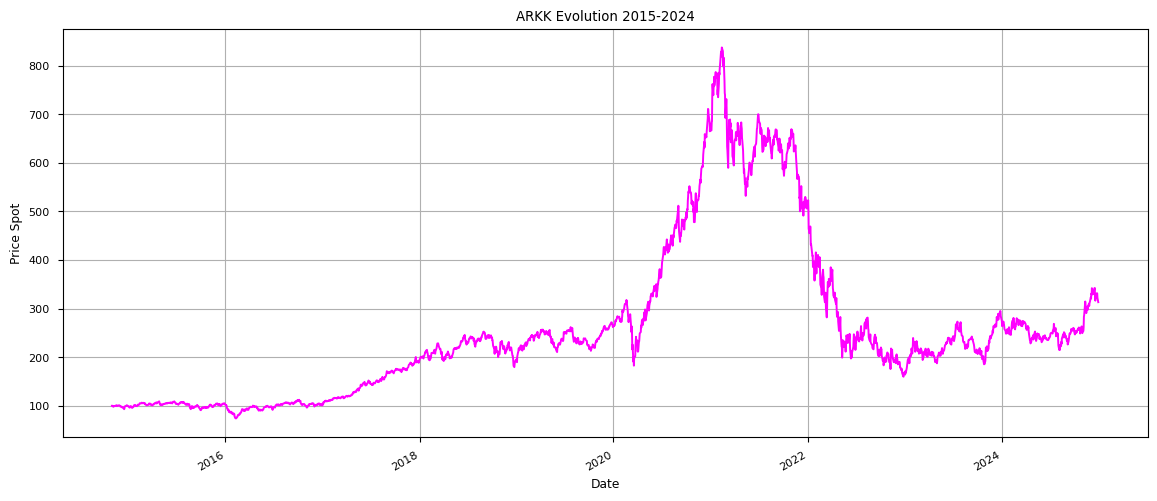

In [876]:
def normalize(data):
    return data['Close'] * 100 / data['Close'].iloc[0]

normalize(arkk).plot(figsize=(14,6), color = 'magenta');
plt.ylabel('Price Spot')
plt.title('ARKK Evolution 2015-2024')
plt.grid(True)
plt.show()

In [877]:
prices = arkk['Close']

In [878]:
returns = prices.pct_change().dropna()

returns.columns = ['ARKK']

In [879]:
stats_returns = returns.describe(include='all')

stats_returns

count    2556.000000
mean        0.000729
std         0.023730
min        -0.155711
25%        -0.010850
50%         0.001612
75%         0.012762
max         0.145226
Name: Close, dtype: float64

In [880]:
mu = returns.mean()
annualized_mu = ((1 + mu) ** 252) - 1

print(f'Daily return of ARKK: {mu * 100:.5f} %')
print(f'Annualized return of ARKK: {annualized_mu * 100:.5f} %')

Daily return of ARKK: 0.07289 %
Annualized return of ARKK: 20.15625 %


In [881]:
sigma = returns.std()
annualized_sigma = sigma * np.sqrt(252)

print(f'Daily volatility of ARKK: {sigma * 100:.5f} %')
print(f'Annualized volatility of ARKK: {annualized_sigma * 100:.5f} %')

Daily volatility of ARKK: 2.37300 %
Annualized volatility of ARKK: 37.67018 %


Jarque-Bera Statistic: 1185.2609
p-value: 0.0000
Conclusion: ❌ Not normally distributed


c:\Users\houss\anaconda3\Lib\site-packages\ysk_quantlib\stats.py:247: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\houss\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


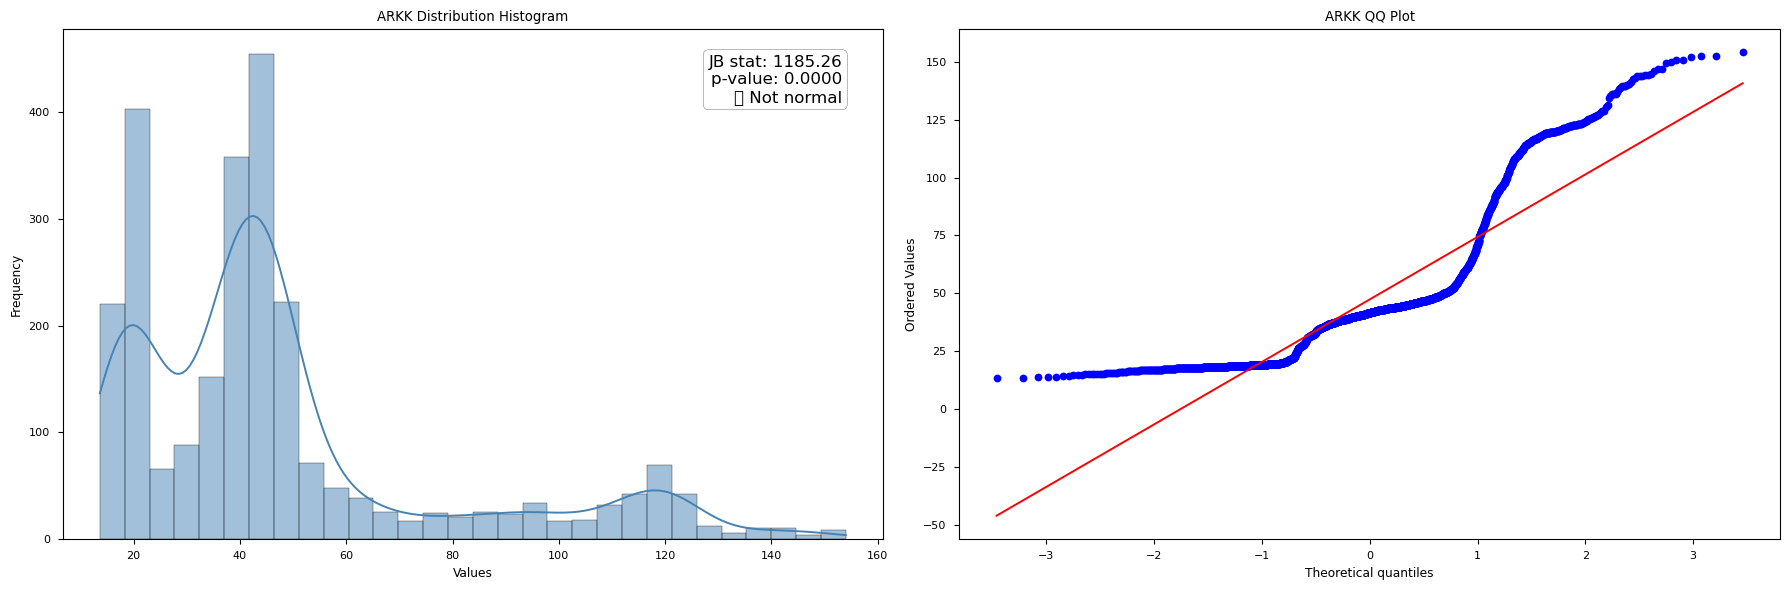

In [882]:
jb_test = jarque_bera_test(prices, verbose=True, plot=True, title_prefix='ARKK ')

In [883]:
adf = adf_test(prices, verbose=True)

                          Valeur
ADF Stat                 -1.4686
p-value                   0.5490
Lags Used                     26
Observations                2530
Critique 1%              -3.4329
Critique 5%              -2.8627
Critique 10%             -2.5674
Conclusion    ❌ Non stationnaire


In [884]:
pp = pp_test(prices, verbose=True)

Statistique PP: -1.4452
p-valeur: 0.5604
Retards utilisés: 27
Critique 10%: -2.5674
Conclusion: ❌ No stationary


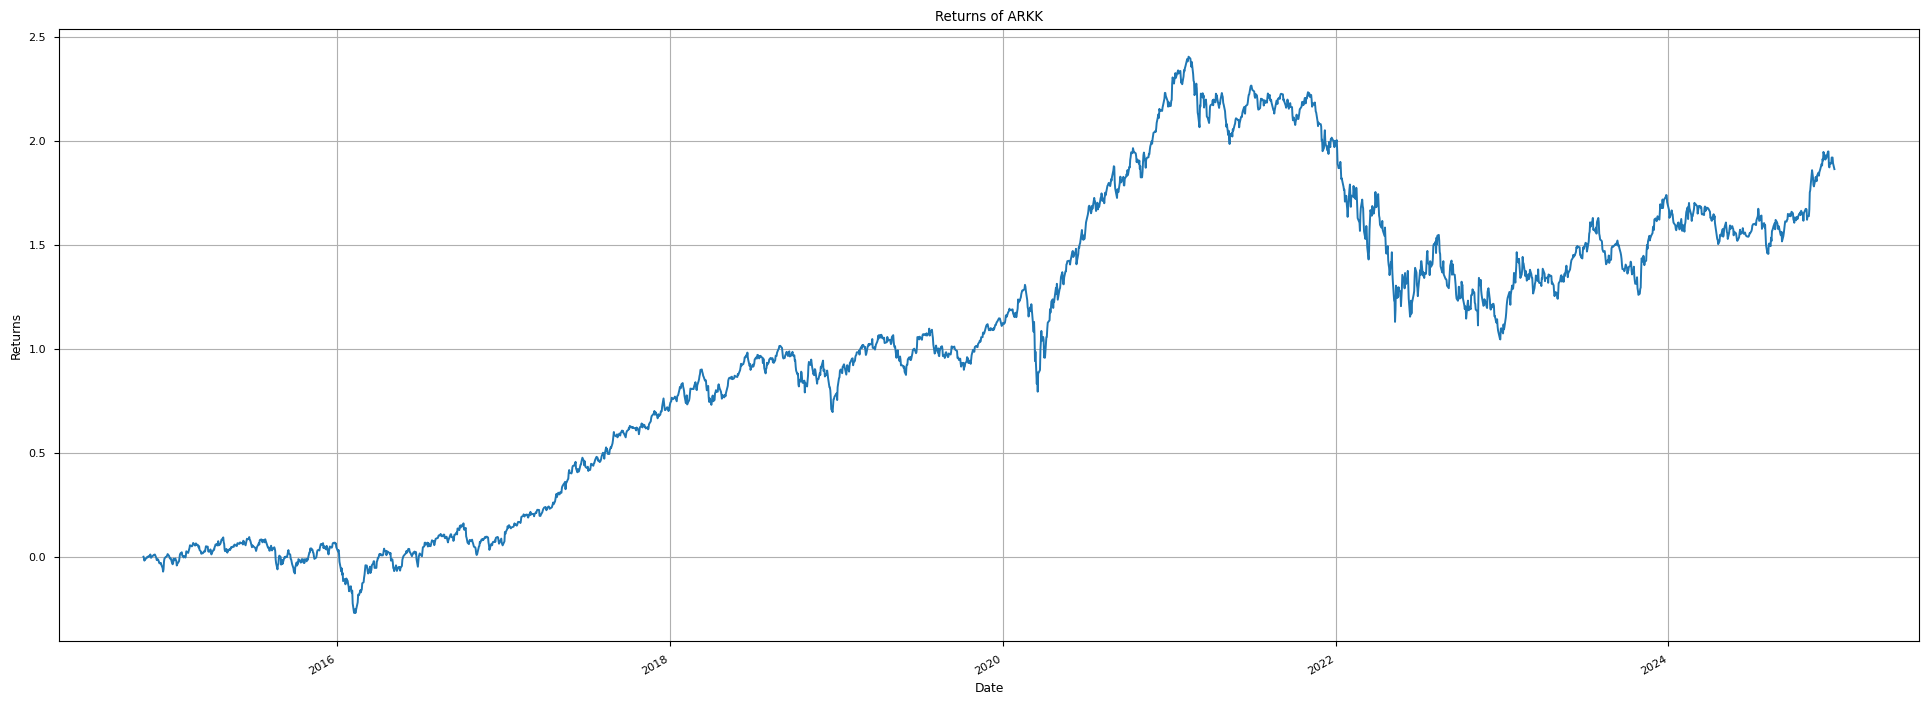

In [885]:
returns.cumsum().plot(figsize=(24,9));
plt.ylabel('Returns')
plt.title('Returns of ARKK')
plt.grid(True)
plt.show()

On a strategy Buy & Hold, you can make almost 2 times the initial investment with this product. So in order to be profitable, 

So at this point, we've studied the characteristics of our product and we are ready to implement the mean-reversion strategy. I will use differents implementations of this trading strategy to illustrate the differences between them :
* Simple Moving Average
* Z-score based on MA
* Pair Trading or Statistical Arbitrage

### I. Basic strategy: Moving Average

In [886]:
ma = pd.DataFrame(arkk['Close'])

ma['ma_21'] = prices.rolling(window=21).mean()

ma['ma_63'] = prices.rolling(window=63).mean()

ma['diff'] = ma['Close'] - ma['ma_21']

ma['signal'] = np.where(ma['diff'] < 0, -0.75, 1.5)

In [887]:
figs = (24,9)

r_f = 0.02

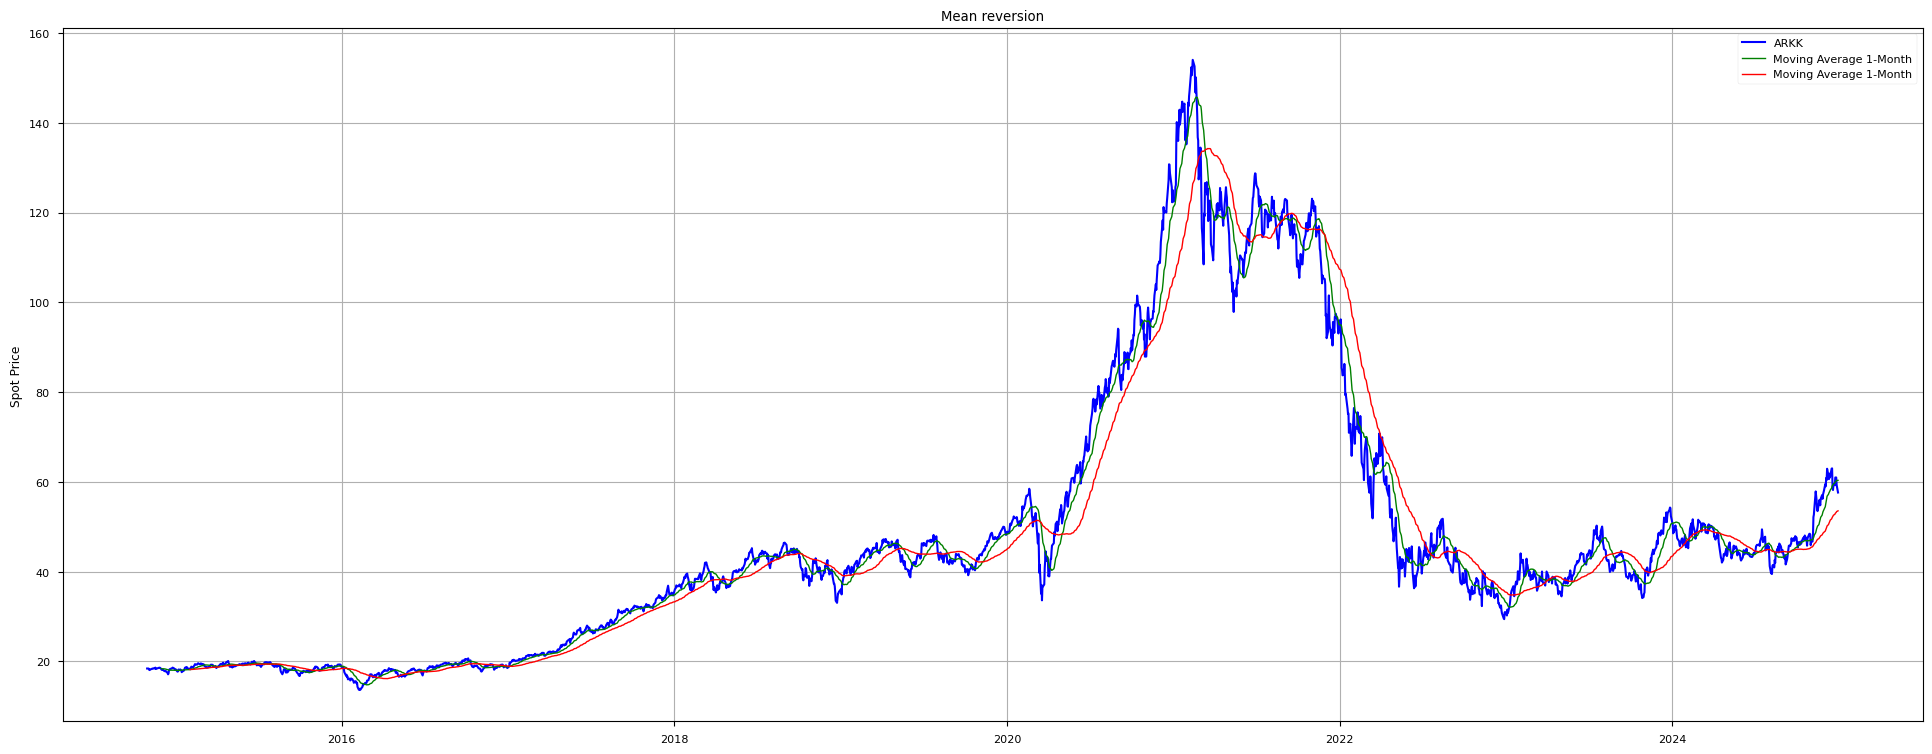

In [888]:
plt.figure(figsize=figs)
plt.plot(prices, label = 'ARKK', color = 'blue', lw = 1.5)
plt.plot(ma['ma_21'], label = 'Moving Average 1-Month', color = 'green', lw = 1)
plt.plot(ma['ma_63'], label = 'Moving Average 1-Month', color = 'red', lw = 1)
plt.ylabel('Spot Price')
plt.title('Mean reversion')
plt.grid(True)
plt.legend(loc=0)
plt.show()

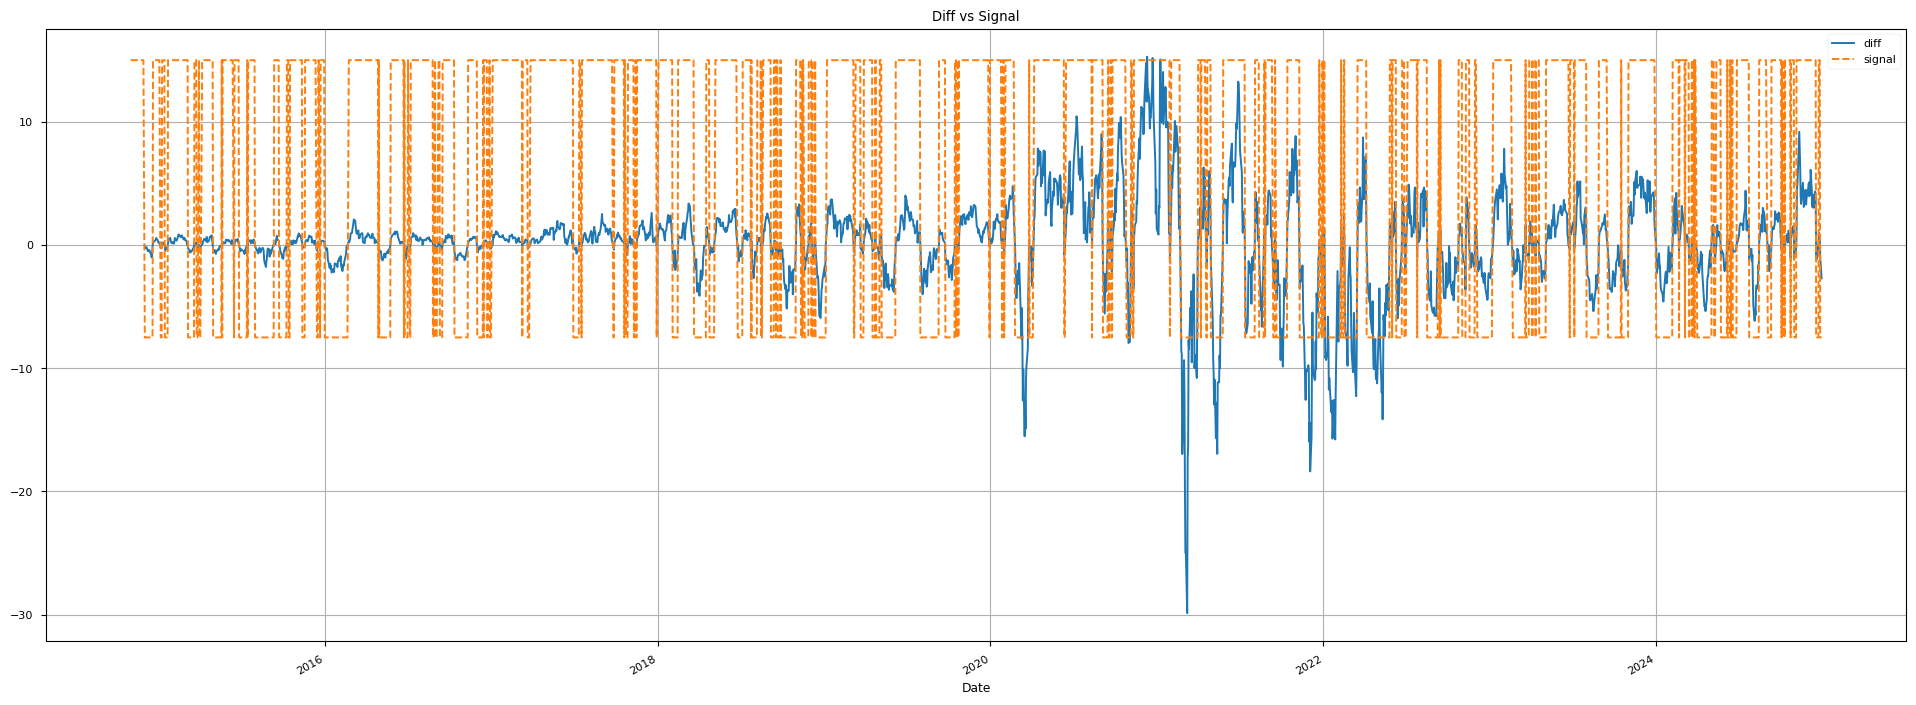

In [889]:
ma['diff'].plot(figsize=figs)
(10*ma['signal']).plot(figsize=figs, linestyle='--')
plt.title("Diff vs Signal")
plt.grid(True)
plt.legend()
plt.show()

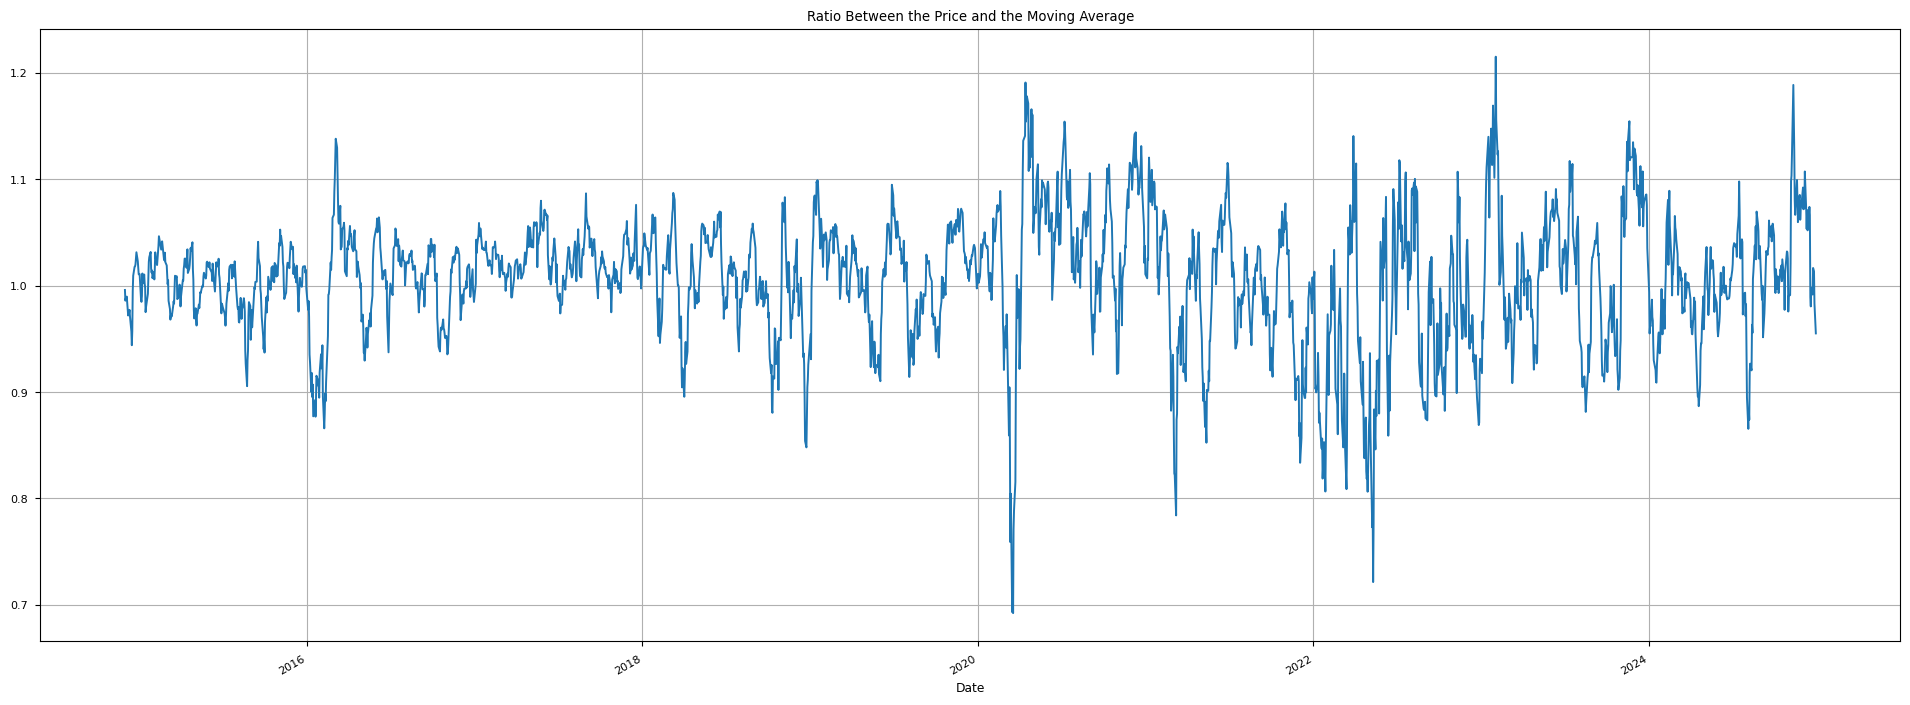

In [890]:
(ma["Close"]/ma["ma_21"] ).plot(figsize=figs)
plt.title("Ratio Between the Price and the Moving Average")
plt.grid(True)
plt.show()

C:\Users\houss\AppData\Local\Temp\ipykernel_4776\1128732409.py:16: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(ma['bh_strategy'], label = 'Buy & Hold Strategy', color = 'red')


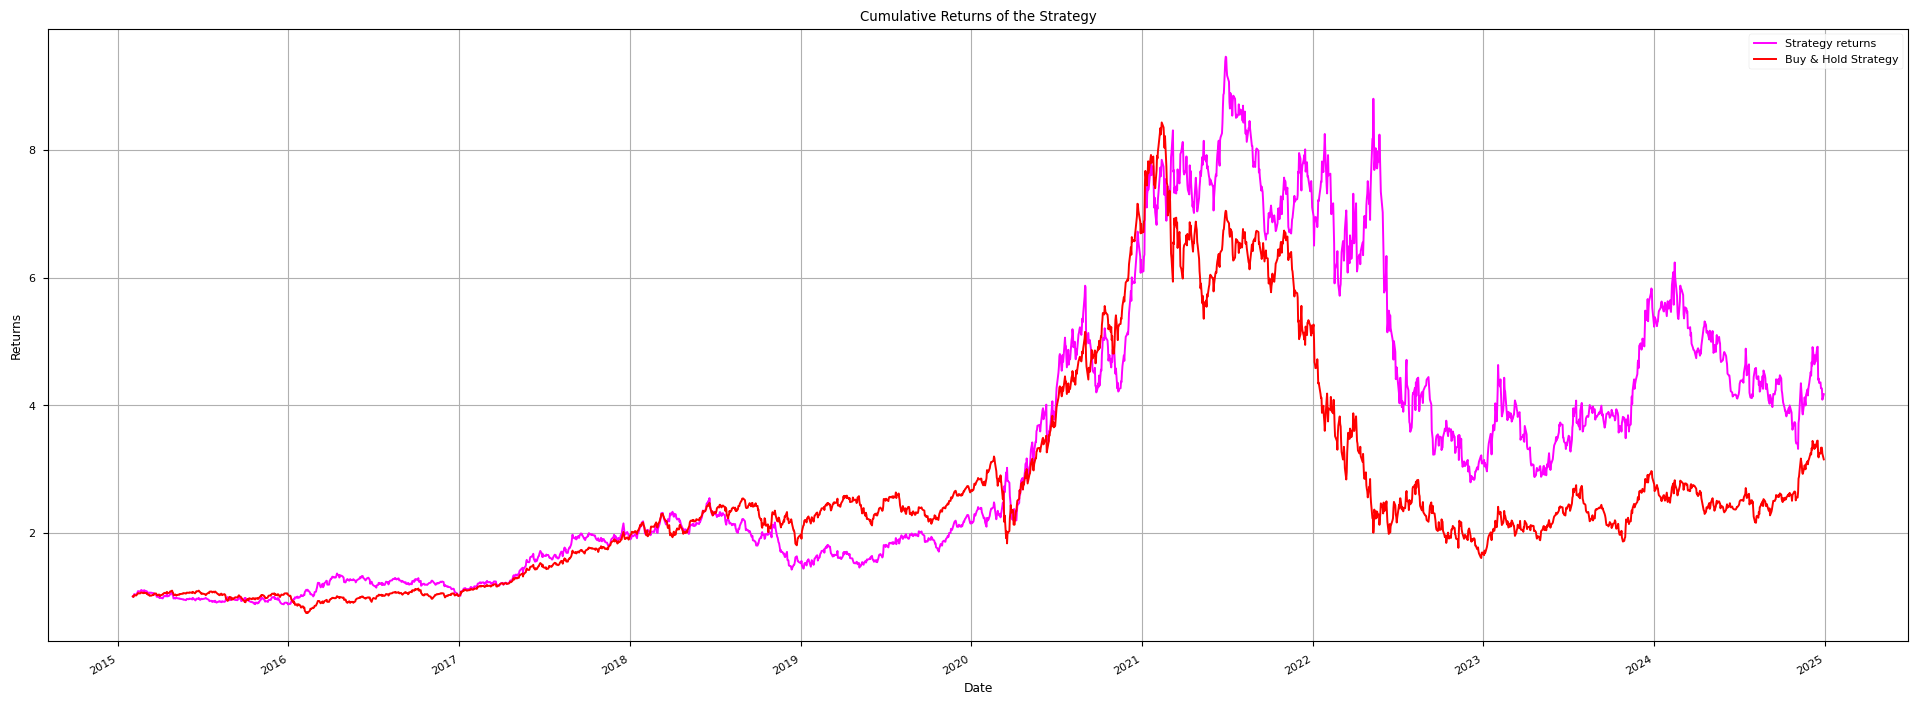

In [891]:
# Backtesting the strategy
# Calculate the daily returns
ma['returns'] = prices.pct_change()

# Calculate the strategy returns
ma['strategy_returns'] = ma['signal'].shift(1) * ma['returns']

# Calculate the cumulative returns
ma=ma.dropna()
ma['cumulative_returns'] = (1 + ma['strategy_returns']).cumprod()

ma['bh_strategy'] = (1 + ma['returns']).cumprod()

# Plot the cumulative returns
ma['cumulative_returns'].plot(figsize = figs, label = 'Strategy returns', color = 'magenta')
plt.plot(ma['bh_strategy'], label = 'Buy & Hold Strategy', color = 'red')
plt.ylabel('Returns')
plt.title("Cumulative Returns of the Strategy")
plt.grid(True)
plt.legend(loc=0)
plt.show()

Here, we can see that the performance of the trading strategy peaks in 2022 and then begins to decline. But with some ajustments within the parameters, the performance of the strategy is improved, but the question remains on the risk of this startegy. However, we can see that the strategy is not profitable enoughugh to be used as a trading strategy. So, let's try another method and see if it's suits better this asset.

In [892]:
sh_1 = (ma['cumulative_returns'].mean() - r_f) / ma['cumulative_returns'].std()

print("Sharpe Ratio of the strategy: ", sh_1)

Sharpe Ratio of the strategy:  1.508573208853309


### II. Z-score strategy

In [893]:
def z_score(x, window):
    return (x - x.rolling(window=window).mean()) / x.rolling(window=window).std()

data = pd.DataFrame()

data['Close'] = prices

data['z-score'] = z_score(prices, 21)

data['ma_21'] = ma['ma_21']

data['std_21'] = prices.rolling(window=21).std()

In [894]:
# Buy order if the z-score is less than n_std (=1)
# Sell order if the z-score is more than n_std (=1)
# Hold if between -1 and 1
n_std= 1.25
data['signal'] = np.where(data['z-score'] > -n_std, 1, np.where(data['z-score'] < n_std,-0.75, 0))

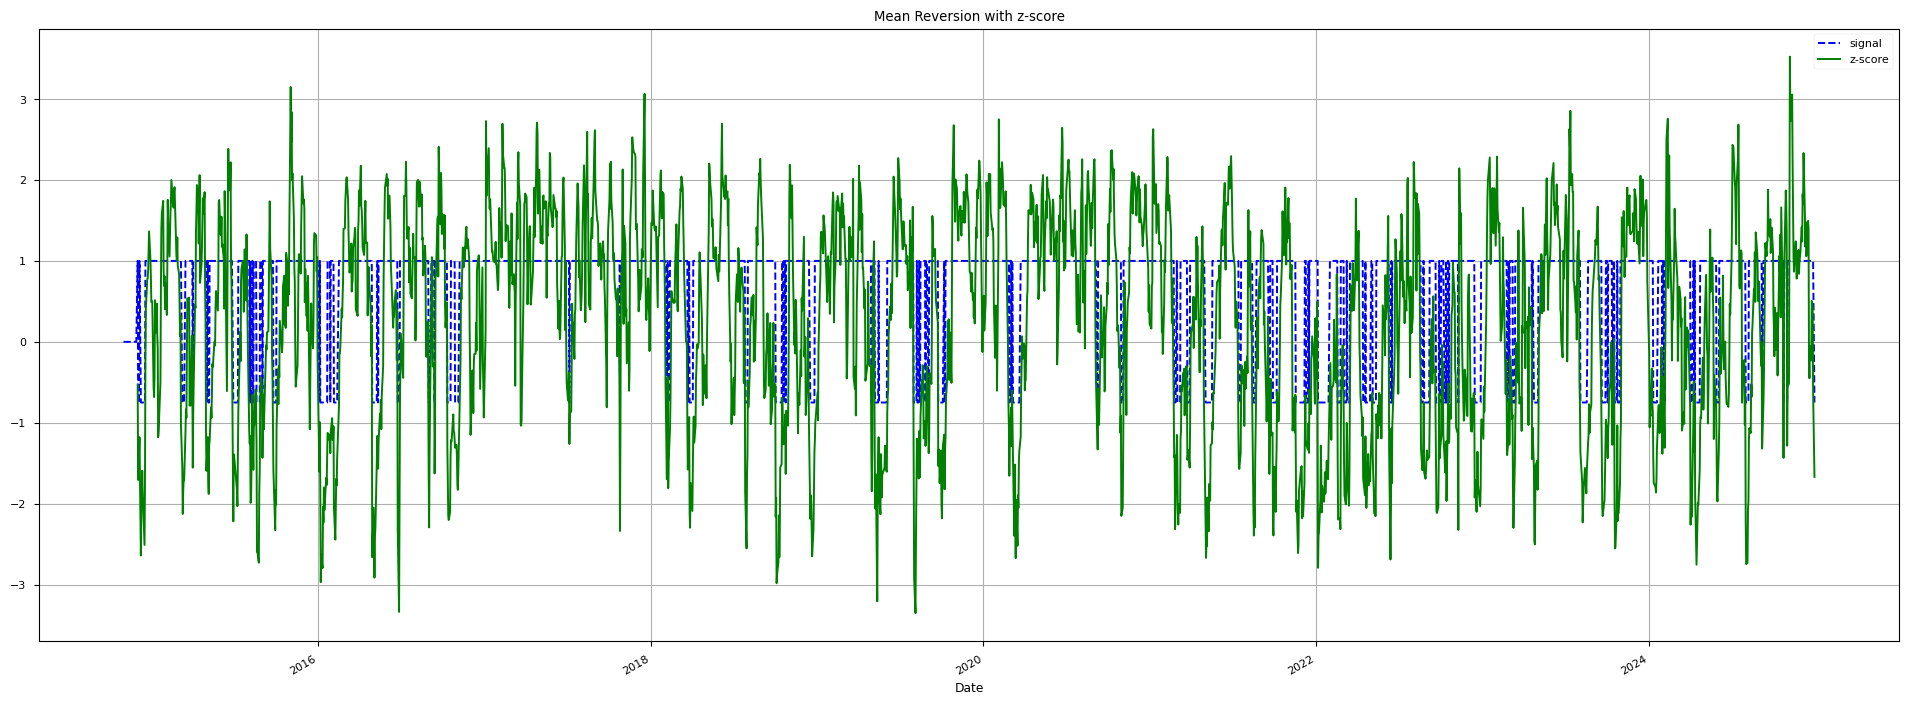

In [895]:
data['signal'].plot(figsize=figs, linestyle="--", color = 'blue')  
data['z-score'].plot(figsize=figs, color='green')         
plt.title("Mean Reversion with z-score")
plt.grid(True)
plt.legend()
plt.show()

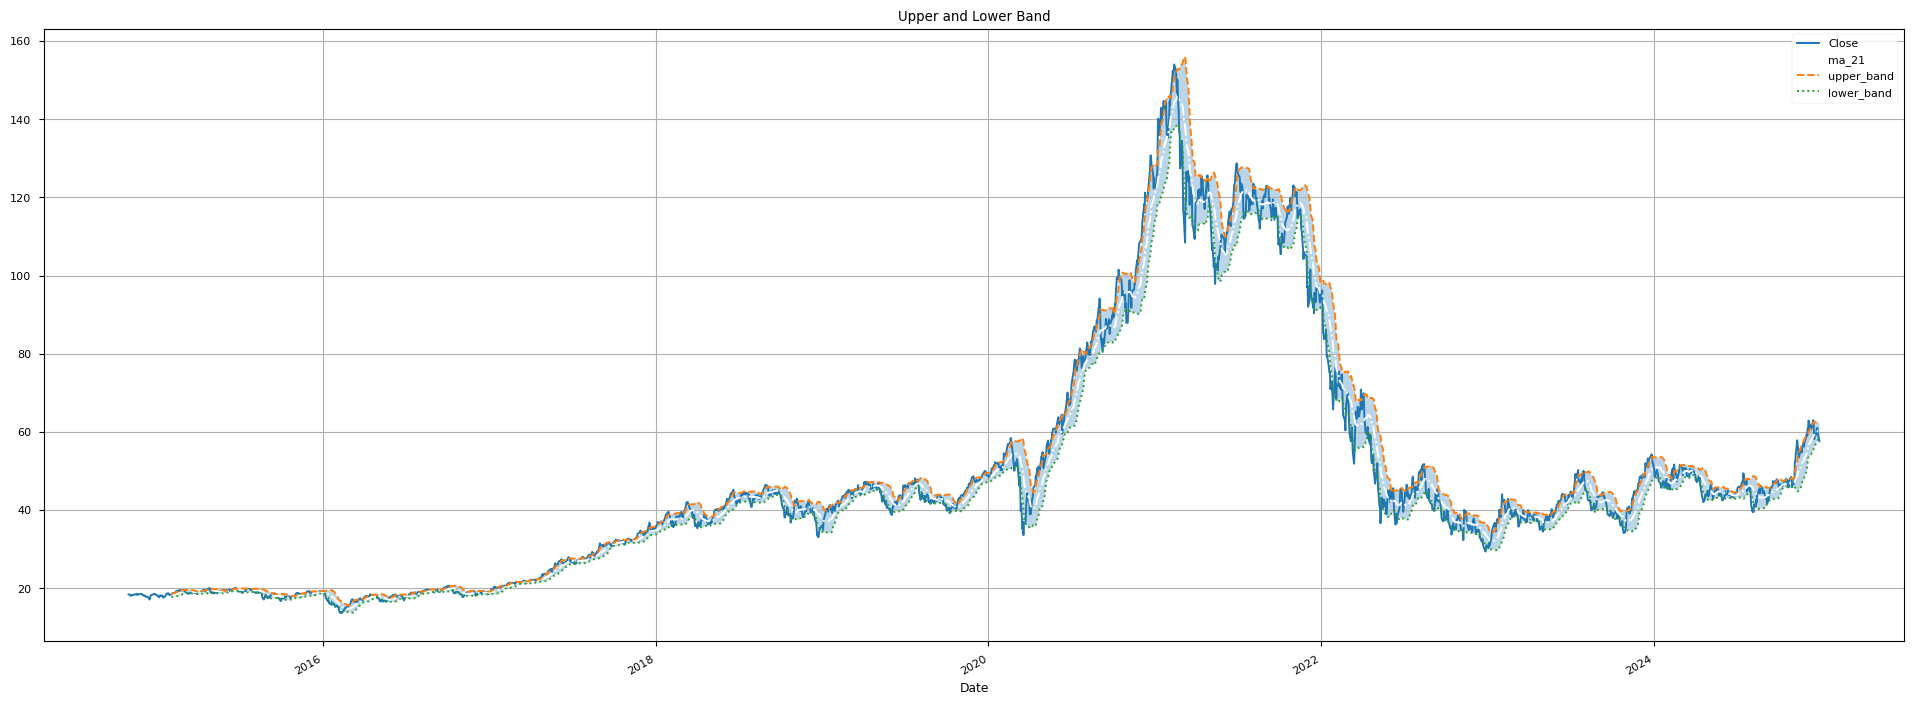

In [896]:
upper_band=data['ma_21']+n_std*data['std_21']
lower_band=data['ma_21']-n_std*data['std_21']

data['Close'].plot(figsize=figs)
data['ma_21'].plot(figsize=figs,linestyle='-.', color="w")
upper_band.plot(linestyle='--',label='upper_band')
lower_band.plot(linestyle=':',label='lower_band')
plt.fill_between(data.index,lower_band, upper_band, alpha=0.3)
plt.title("Upper and Lower Band")
plt.grid(True)
plt.legend()
plt.show()

C:\Users\houss\AppData\Local\Temp\ipykernel_4776\4176126302.py:15: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data['bh_returns'], label='Buy & Hold Strategy', color = 'red')


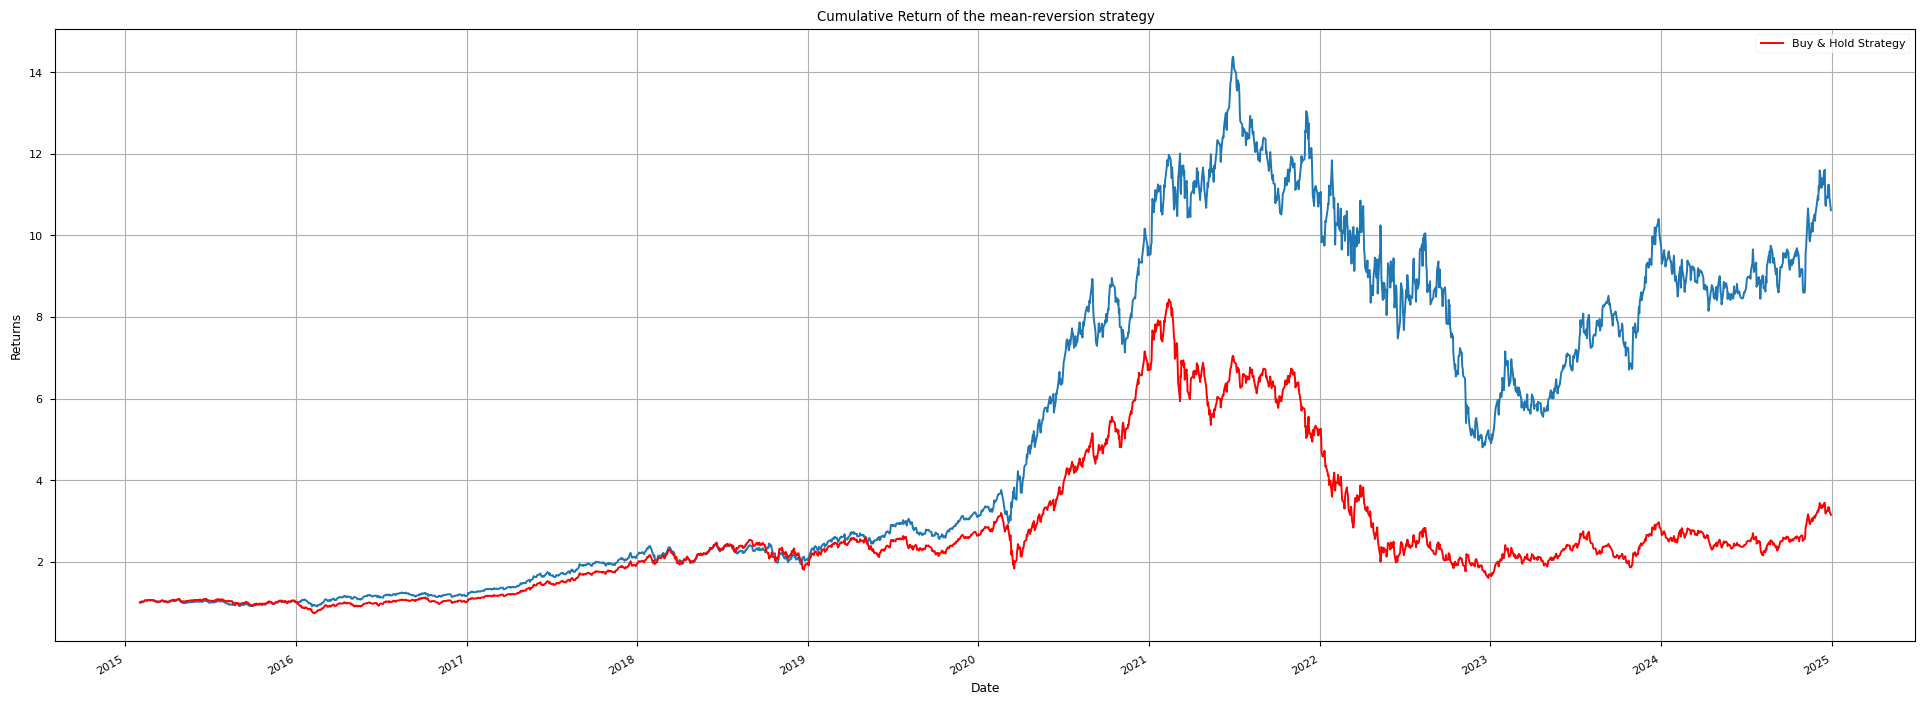

In [897]:
# Calculate the daily returns
data['returns'] = data['Close'].pct_change()

# Calculate the strategy returns
data['strategy_returns'] = data['signal'].shift(1) * data['returns']

# Calculate the cumulative returns
data=data.dropna()
data['cumulative_returns'] = (1 + data['strategy_returns']).cumprod()

data['bh_returns'] = (1 + data['returns']).cumprod()

# Plot the cumulative returns
data['cumulative_returns'].plot(figsize=figs, label = '')
plt.plot(data['bh_returns'], label='Buy & Hold Strategy', color = 'red')
plt.title("Cumulative Return of the mean-reversion strategy")
plt.ylabel('Returns')
plt.grid(True)
plt.legend(loc=0)
plt.show()

In [898]:
sh_2 = (data['cumulative_returns'].mean() - r_f) /data['cumulative_returns'].std()

print('Sharpe Ratio of the z-score Strategy:', sh_2)

Sharpe Ratio of the z-score Strategy: 1.3525586490515178


This strategy is way more effective that the first one. With the z-score, we can capture more accurately the dynamics of the ETF. But, like the first method, we can see a decline in 2022 but here, the peak is in 2021. The z-score method really outperforms the Buy & Hold strategy so it's a win, but with a Sharpe ratio lower than the Moving average method. So, let go on our last method of mean-reversion, statistical arbitrage between two cointegrated assets.

### III. Statistical arbitrage between two cointegrated assets

For this one, I prefer to use stocks instead of ETFs, that doesn't really affect the returns of the strategy, just a preference of mine. So I'll try to use electonic payments companies, Visa and Mastercard but we need first to verify if they are cointegrated, and for that, I'll use my library ysk_quantlib and the Engle-Granger test.

In [899]:
vs = pd.read_excel('vma.xlsx', sheet_name='Vista')
mad = pd.read_excel('vma.xlsx', sheet_name='Mastercard')

vs = vs.set_index('Date')
mad = mad.set_index('Date')

In [900]:
data_sta = pd.concat((vs['Close'], mad['Close']), axis=1)

data_sta.columns = ['VS', 'MAD']

data_sta

,VS,MAD
Date,,
2020-01-02,183.872055,294.123230
2020-01-03,182.409683,291.253540
2020-01-06,182.015259,292.029175
2020-01-07,181.534195,291.040405
2020-01-08,184.641678,296.175537
...,...,...
2024-12-23,316.162048,527.345154
2024-12-24,319.580597,534.074524
2024-12-26,319.839752,534.513184


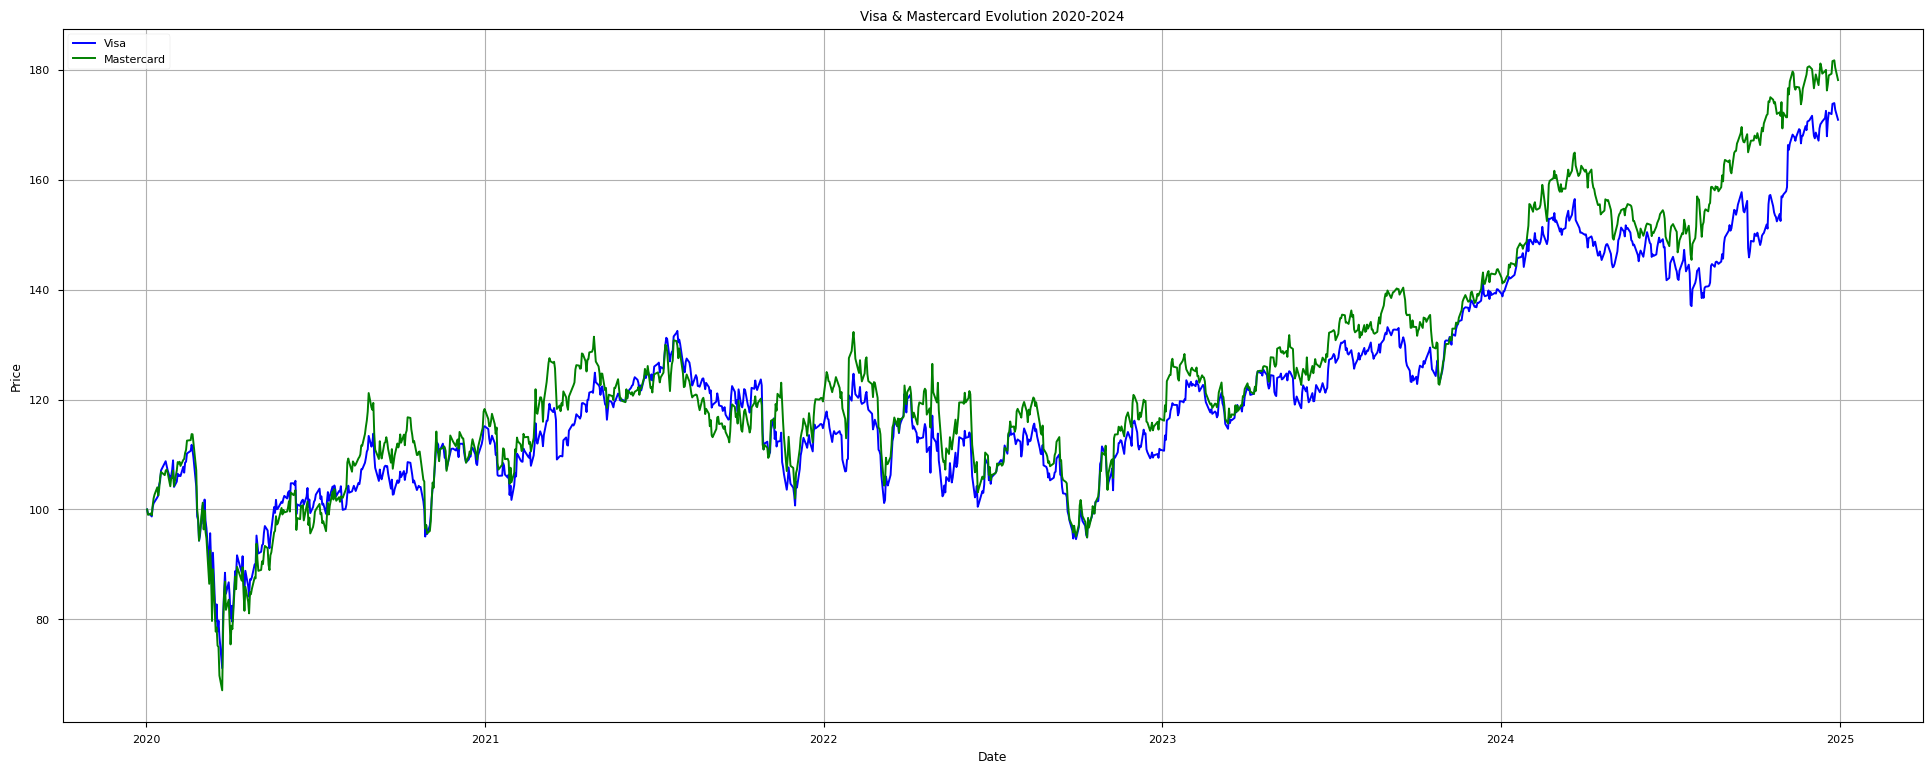

In [901]:
plt.figure(figsize=figs)
plt.plot(normalize(vs), label = 'Visa', color = 'blue')
plt.plot(normalize(mad), label = 'Mastercard', color = 'green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Visa & Mastercard Evolution 2020-2024')
plt.grid(True)
plt.legend(loc=0)
plt.show()

Just by looking to this graph, you can see a long-term relation between the two stocks which means that there are cointegrated. But just to be sure, we'll use the Engle-Granger test for cointegration and also display a correlation matrix style heat-map.

In [902]:
cointegration_test(data_sta['VS'], data_sta['MAD'])

Test statistic     : -4.6432
p-value            : 0.0007
Critical values    : {'1%': '-3.9052', '5%': '-3.3410', '10%': '-3.0478'}
✅ The series are cointegrated at the 5% level.


{'test_statistic': np.float64(-4.643248425804904),
 'p_value': np.float64(0.0007053507502192056),
 'critical_values': {'1%': np.float64(-3.9051809183688997),
  '5%': np.float64(-3.3409990543987584),
  '10%': np.float64(-3.047828475800235)},
 'cointegrated': np.True_}

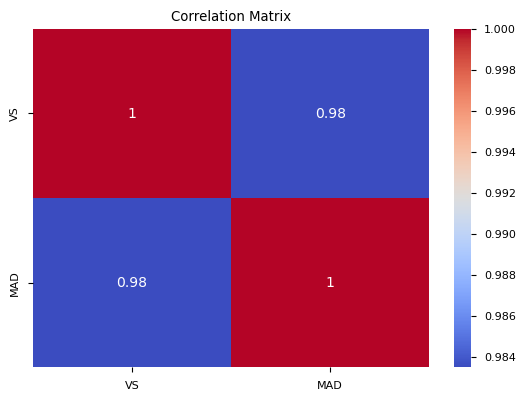

In [903]:
correlation_matrix = data_sta.corr()

# Visualisation en heat map de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [904]:
ticker_long = 'MAD'
ticker_short = 'VS'

In [905]:
import statsmodels.api as sm

X = data_sta[ticker_short]
Y = data_sta[ticker_long]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
hedge_ratio = model.params[1]  


spread = data_sta[ticker_long] - hedge_ratio * data_sta[ticker_short]

C:\Users\houss\AppData\Local\Temp\ipykernel_4776\1594786312.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = model.params[1]


In [906]:
window = 21
n_std = .5

In [907]:
zscore = z_score(spread, window)

rolling_mean = spread.rolling(window=window).mean()
rolling_std = spread.rolling(window=window).std()

upper_band = rolling_mean + n_std * rolling_std
lower_band = rolling_mean - n_std * rolling_std

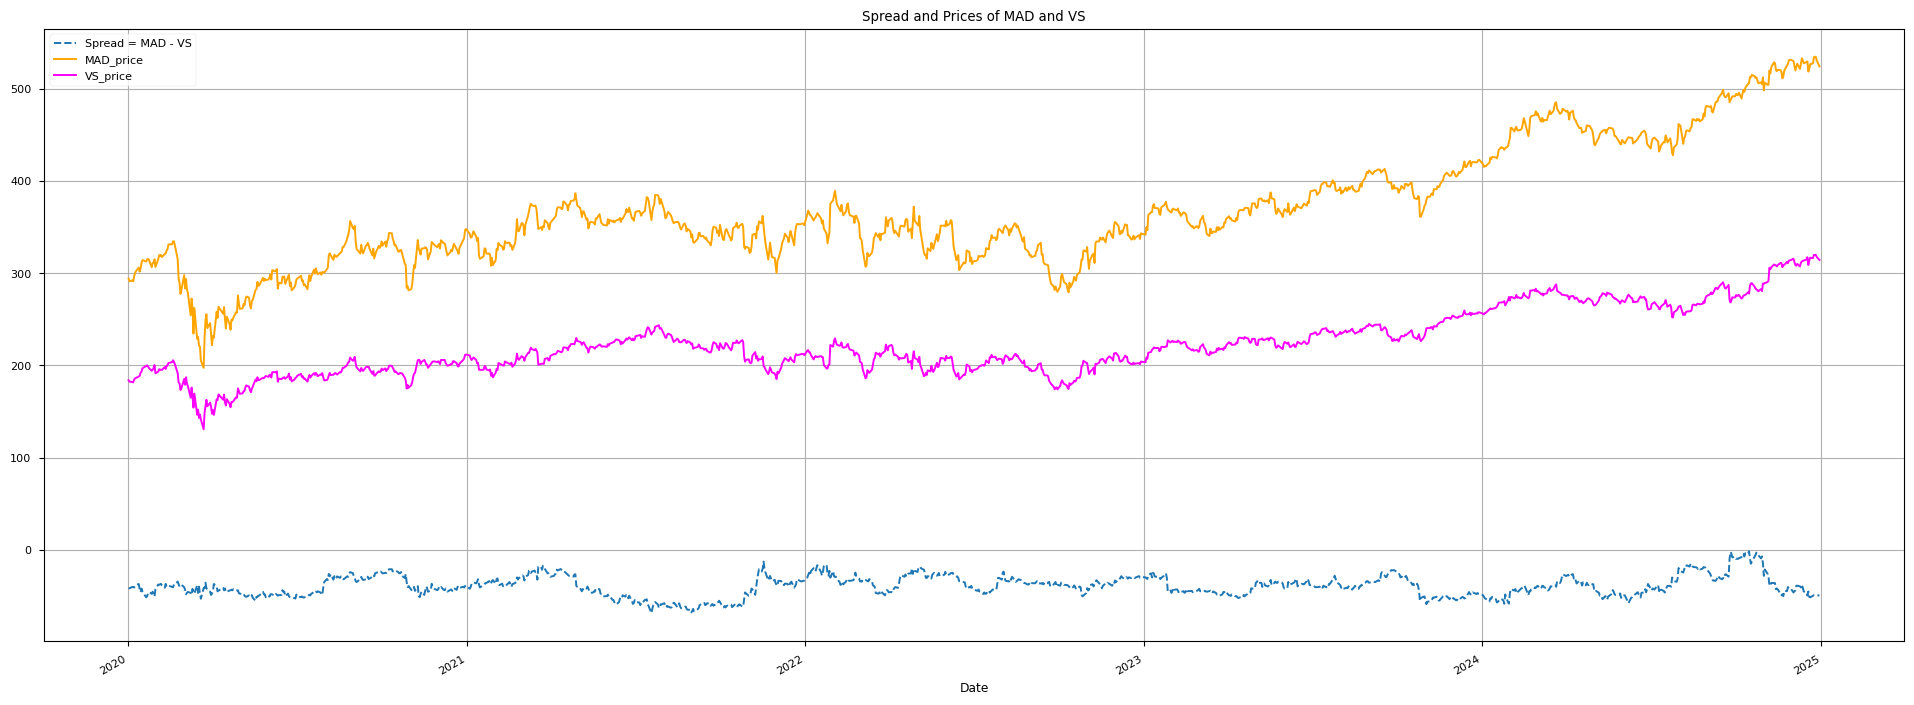

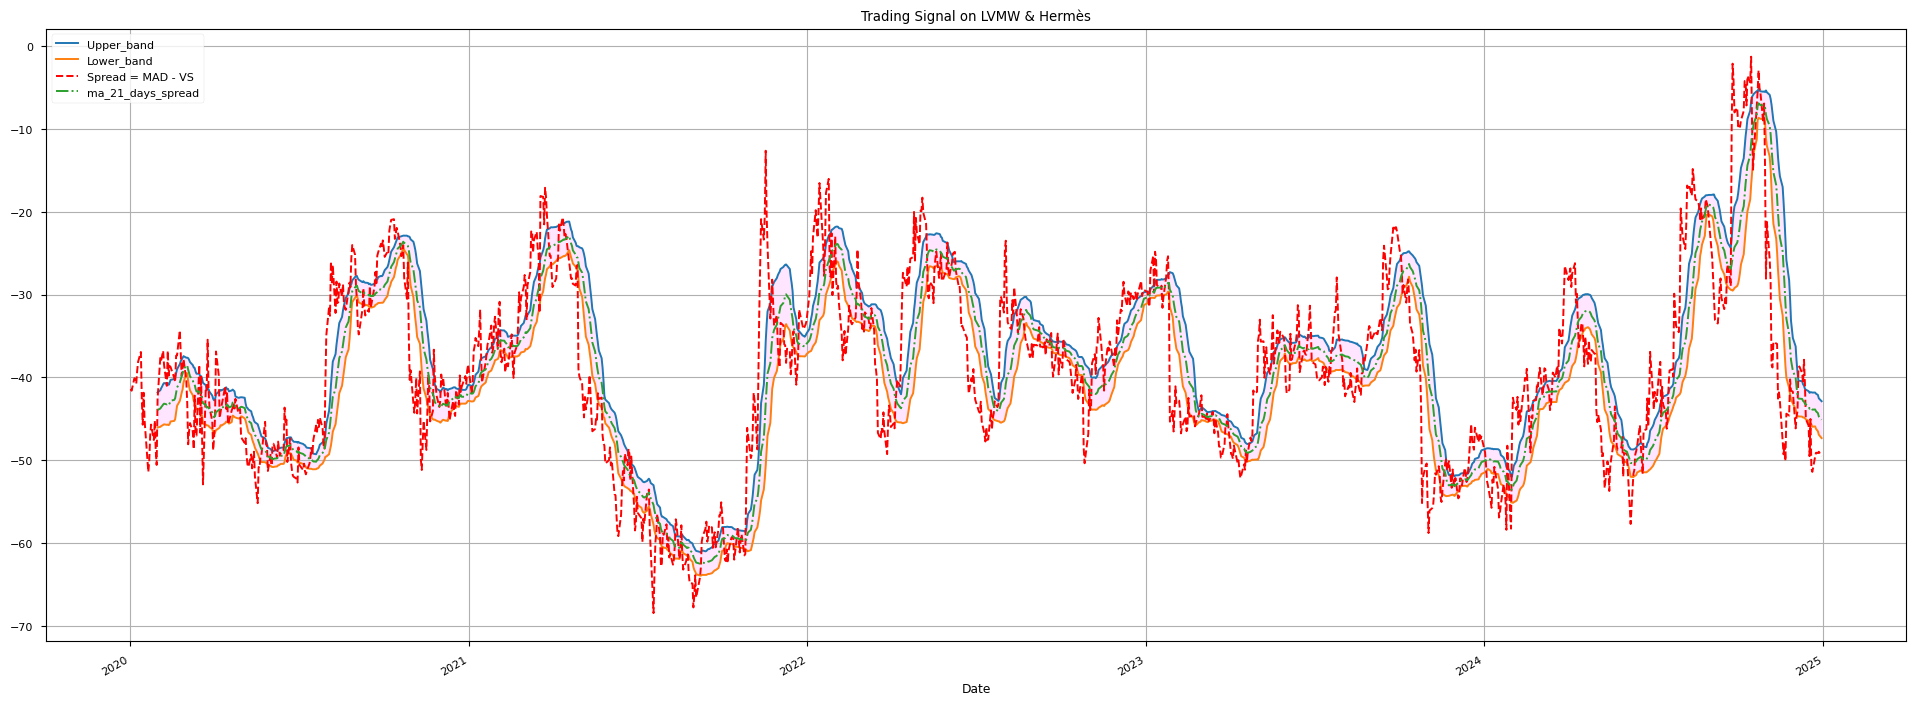

In [908]:
plt.figure(figsize = figs)
spread.plot(label='Spread = '+ticker_long+' - '+ ticker_short,linestyle='--')
data_sta[ticker_long].plot(label=ticker_long+'_price', color = 'orange')
data_sta[ticker_short].plot(label=ticker_short+'_price', color = 'magenta')
plt.title("Spread and Prices of {0} and {1}".format(ticker_long,ticker_short))
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize = figs)
upper_band.plot(label='Upper_band')
lower_band .plot(label='Lower_band')
spread.plot(label = 'Spread = '+ticker_long+' - '+ ticker_short,linestyle='--', color='red')
rolling_mean.plot(label = 'ma_21_days_spread', linestyle = '-.')
plt.fill_between(data_sta.index,lower_band, upper_band, alpha=0.1, color = 'magenta')
plt.title('Trading Signal on LVMW & Hermès')
plt.grid(True)
plt.legend()
plt.show()

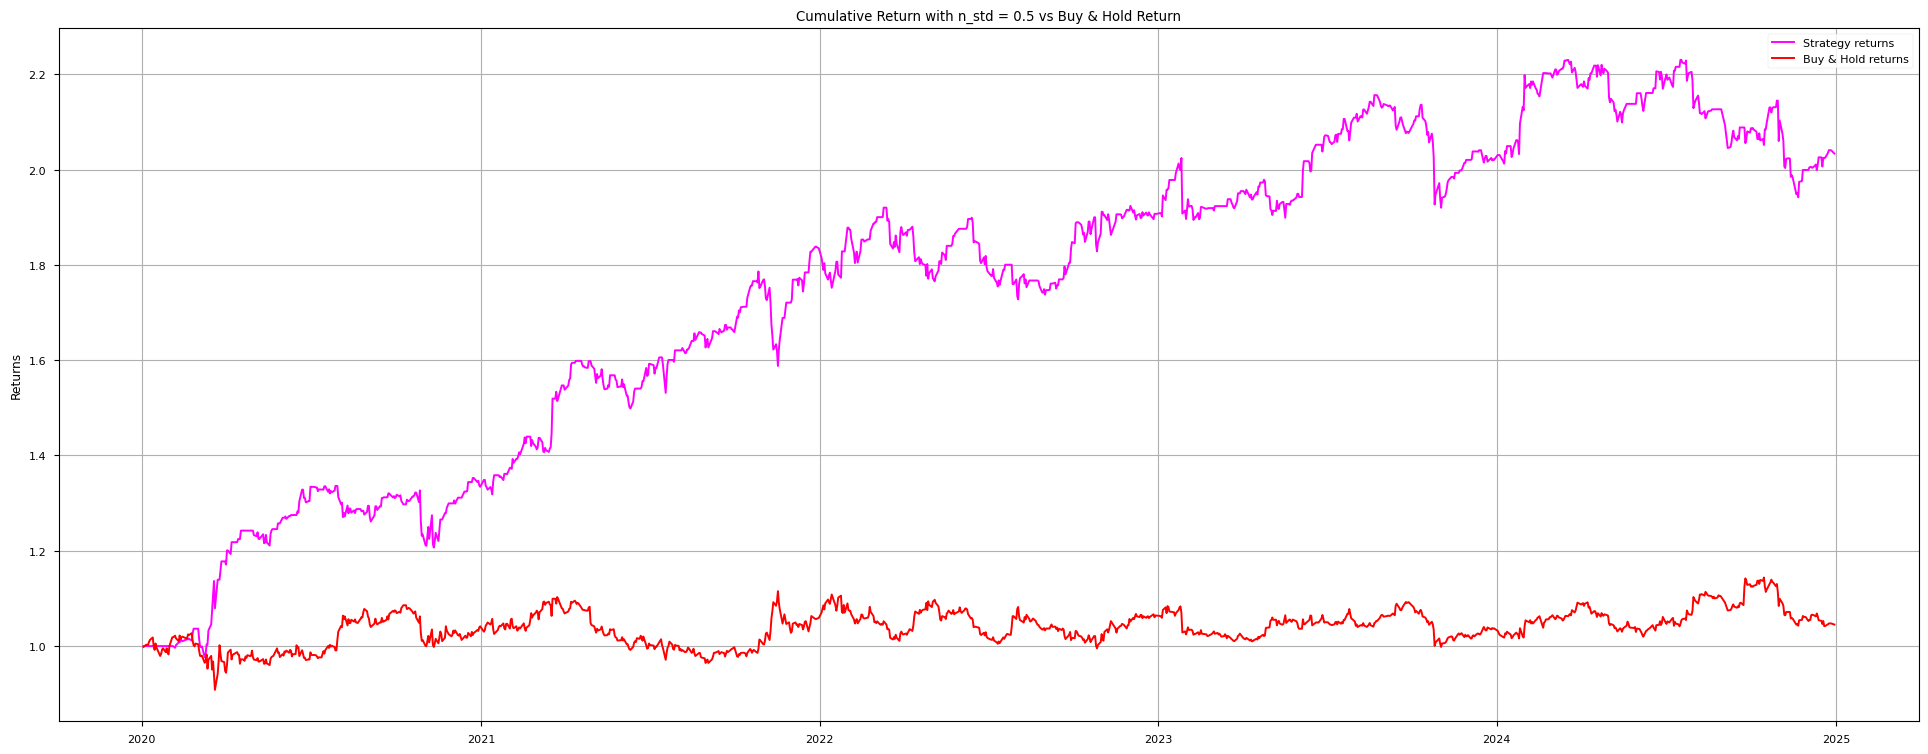

In [909]:
# Long position if z-score < -n_std
# Short position if z-score > n_std

signal = np.where(zscore < -n_std, 1.5, np.where(zscore > n_std, -1, 0))
signal = pd.Series(signal, index=data_sta.index)

returns = data_sta[ticker_long].pct_change() - data_sta[ticker_short].pct_change()

strategy_returns = signal.shift(1) * returns

cumulative_returns = (1 + strategy_returns).cumprod()

bh_returns = (1 + returns).cumprod()

# Plot the cumulative returns
plt.figure(figsize = figs)
plt.plot(cumulative_returns, label='Strategy returns', color = 'magenta')
plt.plot(bh_returns, label='Buy & Hold returns', color = 'red')
plt.ylabel('Returns')
plt.title("Cumulative Return with n_std = {0} vs Buy & Hold Return".format(n_std))
plt.grid(True)
plt.legend(loc=0)
plt.show()

In [910]:
sh_3 = (cumulative_returns.mean() - r_f) / cumulative_returns.std()

print('Sharpe ratio of the Stat Arbitrage:', sh_3)

Sharpe ratio of the Stat Arbitrage: 5.167235385388227


Compared to our previous strategies, this strategy appears to be the least profitable, but it has the best Sharpe ratio. However, it is a little too high, so I will have to test it with another pair of assets to see if it is not an overadjusted result.